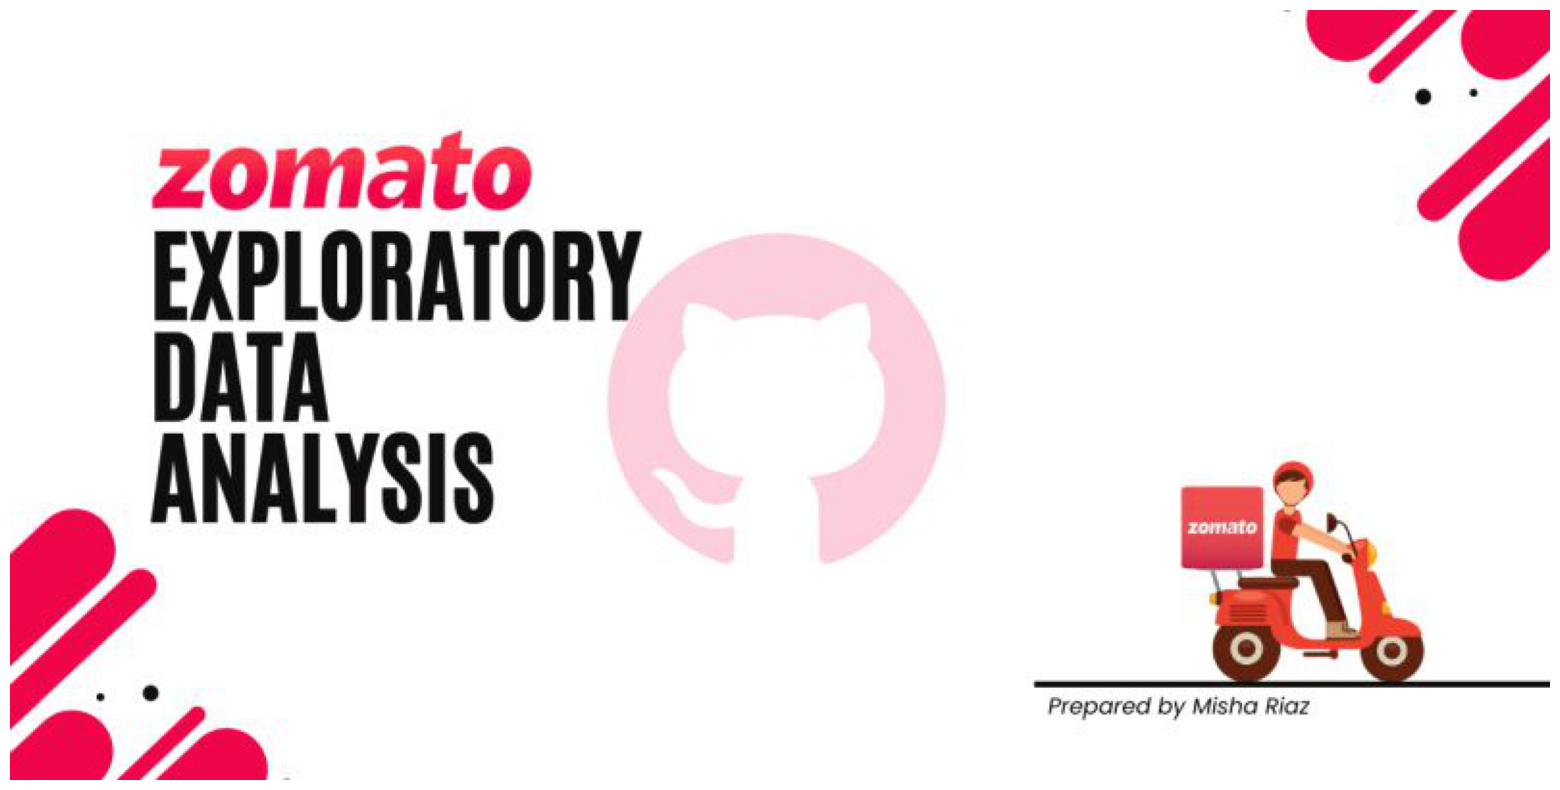

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image path
image_path = r"C:\Users\Lenovo\Downloads\presenation file all topic\eda zmato project.jpg"

# Load image
img = mpimg.imread(image_path)

# Set large figure size for full-width display
plt.figure(figsize=(20, 10))  # Width=20 inches, Height=10 inches
plt.imshow(img)
plt.axis('off')
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import folium
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('zomato_data.csv',on_bad_lines='warn')
df2=pd.read_csv('Geographical Coordinates.csv')
print(df1.shape)
print(df2.shape)

(51717, 10)
(26, 3)


In [3]:
df1.head()

online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian                       800        Buffet   
3      South Indian, North Indian                       300        Buffet   
4        North Indian, Rajasthani                       600        Buffet   

  listed_incity  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [5]:
df1.isnull().sum()/len(df1)*100

online_order                  0.000000
book_table                    0.000000
rate                         15.033741
votes                         0.000000
rest_type                     0.438927
dish_liked                   54.291626
cuisines                      0.087012
approx_costfor_two_people     0.669026
listed_intype                 0.000000
listed_incity                 0.000000
dtype: float64

In [6]:
# Rate Columns
# Replace '-' with NaN
df1['rate'] = df1['rate'].replace('-', pd.NA)

# Remove '/5' and strip whitespace
df1['rate'] = df1['rate'].str.replace('/5', '').str.strip()

# Convert to float
df1['rate'] = pd.to_numeric(df1['rate'], errors='coerce')

# Fill missing values with the median
df1['rate'].fillna(df1['rate'].median(), inplace=True)


In [7]:
# approx_costfor_two_people  Columns

# Remove commas and convert to numeric
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(str).str.replace(',', '')
df1['approx_costfor_two_people'] = pd.to_numeric(df1['approx_costfor_two_people'], errors='coerce')

# Fill NaNs with median
df1['approx_costfor_two_people'].fillna(df1['approx_costfor_two_people'].median(), inplace=True)

In [8]:
df1['dish_liked'].fillna("Not Available", inplace=True)
df1['cuisines'].fillna("Other", inplace=True)
df1['rest_type'].fillna("Unknown", inplace=True)

In [9]:
df1['votes'].fillna(df1['votes'].median(), inplace=True)


In [10]:
binary_map = {'Yes': 1, 'No': 0}
df1['online_order'] = df1['online_order'].map(binary_map)
df1['book_table'] = df1['book_table'].map(binary_map)


In [11]:
df1['rate'] = df1['rate'].astype(float)
df1['votes'] = df1['votes'].astype(int)
df1['approx_costfor_two_people'] = df1['approx_costfor_two_people'].astype(int)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB


In [13]:
df1.isnull().sum()

online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type                    0
dish_liked                   0
cuisines                     0
approx_costfor_two_people    0
listed_intype                0
listed_incity                0
dtype: int64

# Merge with Location Data

In [15]:
merged_df = pd.merge(df1, df2, on='listed_incity', how='left')
merged_df.head()


online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian                        800        Buffet   
3      South Indian, North Indian                        300        Buffet   
4        North Indian, Rajasthani                        600        Buffet   

  listed_incity   Latitude  Longitude  
0  Banashankari  12.939333  77.553982  
1  Banashankari  12.939333  77.553982  
2  Banashankari  12.939333  77.553982  
3  Banashankari  12.939333  77.553982  
4  Banashankari  12.939333  77.553982

<Axes: ylabel='listed_incity'>

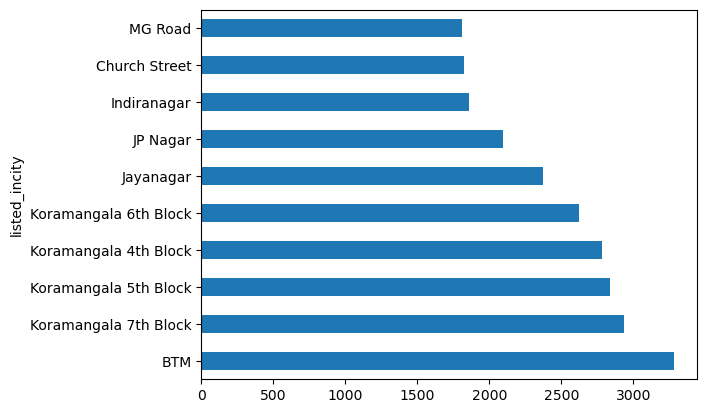

In [16]:
merged_df['listed_incity'].value_counts().head(10).plot(kind='barh')

<Axes: xlabel='online_order', ylabel='rate'>

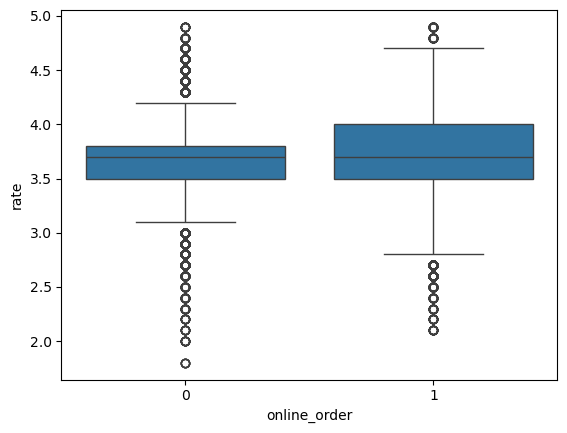

In [17]:
sns.boxplot(x='online_order', y='rate', data=merged_df)

<Axes: xlabel='rest_type'>

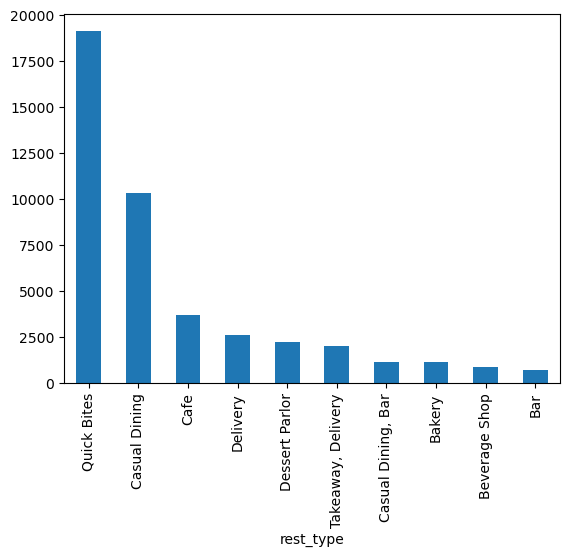

In [18]:
merged_df['rest_type'].value_counts().head(10).plot(kind='bar')


<Axes: xlabel='approx_costfor_two_people', ylabel='rate'>

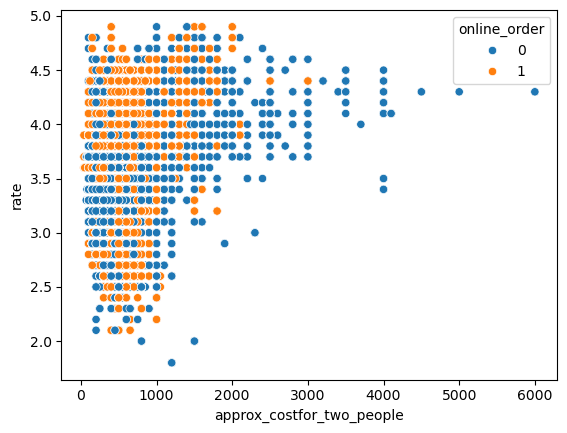

In [19]:
sns.scatterplot(x='approx_costfor_two_people', y='rate', hue='online_order', data=merged_df)

In [20]:
# Ensure 'cuisines' column is in lowercase or consistent format
italian_df = merged_df[merged_df['cuisines'].str.contains('Italian', case=False, na=False)]
italian_df.head()

online_order  book_table  rate  votes            rest_type  \
2              1           0   3.8    918  Cafe, Casual Dining   
7              1           1   4.6   2556  Casual Dining, Cafe   
8              1           0   4.0    324                 Cafe   
9              1           0   4.2    504                 Cafe   
11             1           1   4.2    150                 Cafe   

                                           dish_liked  \
2   Churros, Cannelloni, Minestrone Soup, Hot Choc...   
7   Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8   Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9   Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   
11  Mocktails, Peri Fries, Lasagne, Pizza, Chicken...   

                                    cuisines  approx_costfor_two_people  \
2                     Cafe, Mexican, Italian                        800   
7                       Pizza, Cafe, Italian                        600   
8                 Cafe, Italian, Continental                        700   
9   Cafe, Mexican, Italian, Momos, Beverages                        550   
11                Cafe, Italian, Continental                        600   

   listed_intype listed_incity   Latitude  Longitude  
2         Buffet  Banashankari  12.939333  77.553982  
7          Cafes  Banashankari  12.939333  77.553982  
8          Cafes  Banashankari  12.939333  77.553982  
9          Cafes  Banashankari  12.939333  77.553982  
11         Cafes  Banashankari  12.939333  77.553982

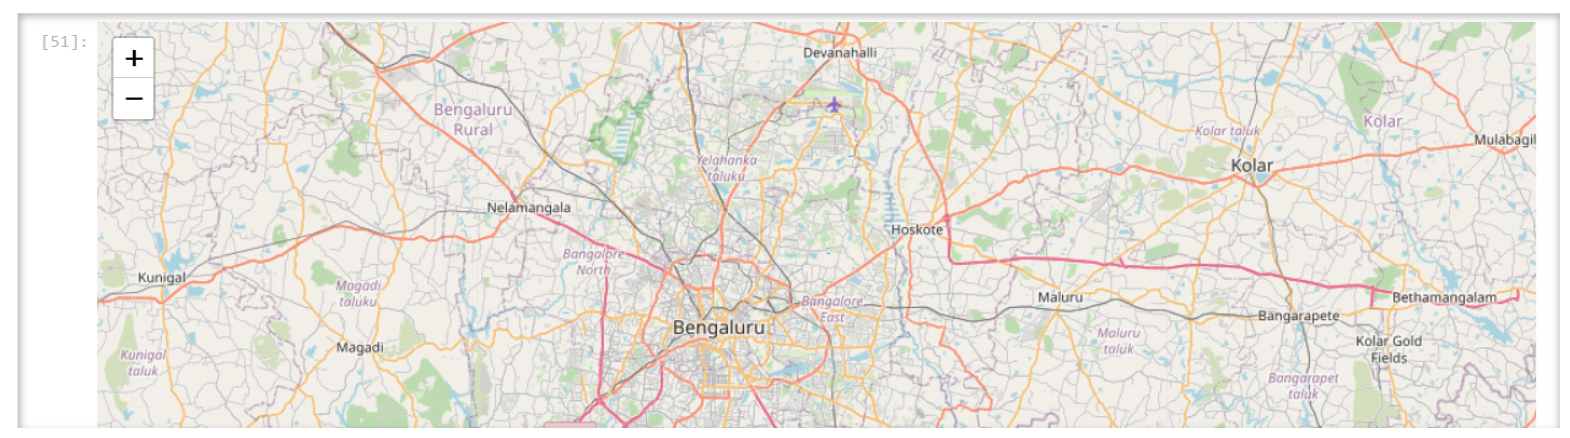

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Initialize the map centered around Bangalore
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
bangalore_map

# Image path
image_path = r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-04-21 152849.png"

# Load image
img = mpimg.imread(image_path)

# Set large figure size for full-width display
plt.figure(figsize=(20, 10))  # Width=20 inches, Height=10 inches
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
# Add a marker for each Italian restaurant
for index, row in italian_df.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        popup_text = f"""
        <b>City:</b> {row['listed_incity']}<br>
        <b>Cuisines:</b> {row['cuisines']}
        """
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=popup_text,
            icon=folium.Icon(color='purple', icon='cutlery', prefix='fa')
        ).add_to(bangalore_map)

In [23]:
bangalore_map.save("italian_restaurants_map.html")

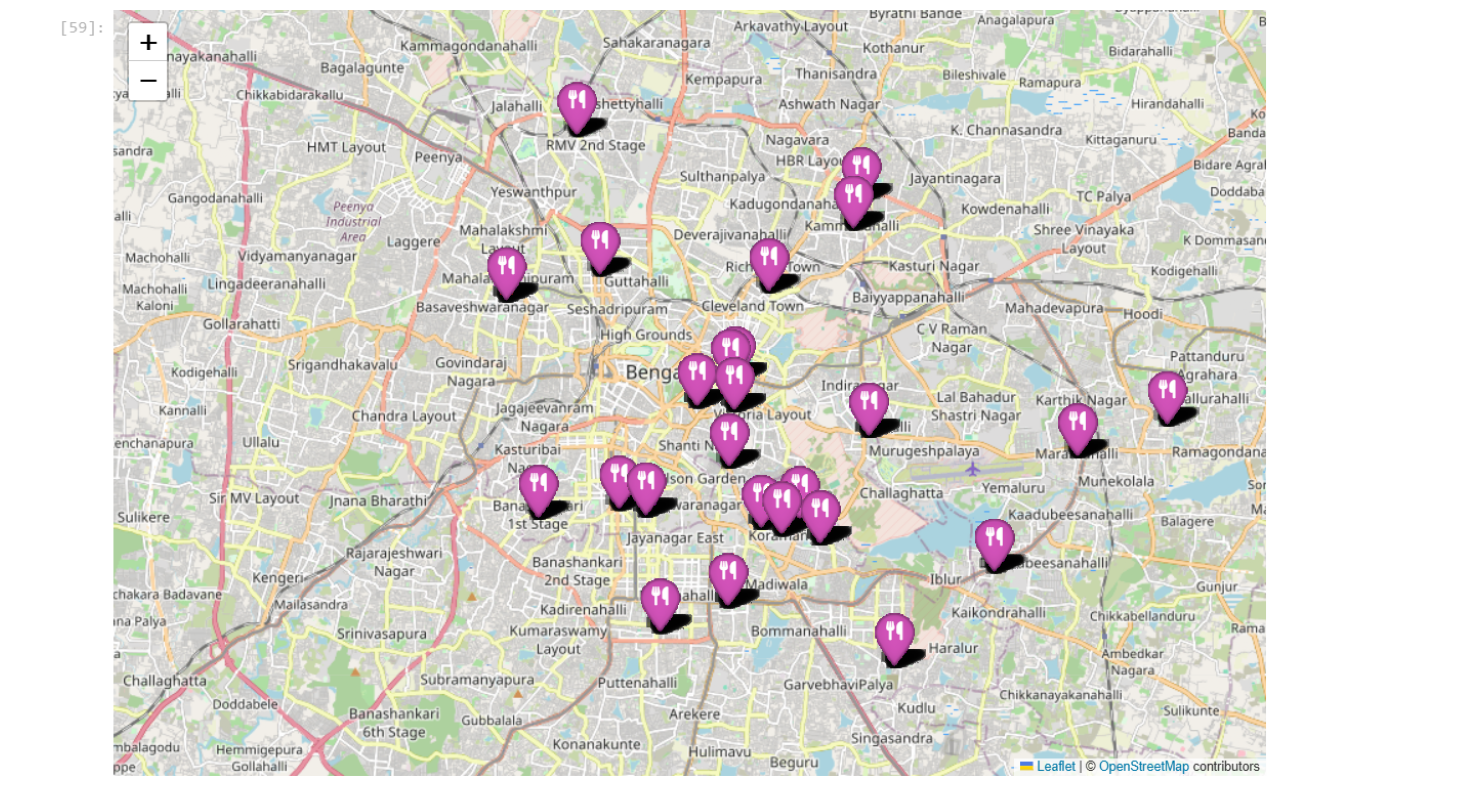

In [61]:
IFrame(src='italian_restaurants_map.html', width=900, height=600)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image path
image_path= r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2025-04-21 153304.png"

# Load image
img = mpimg.imread(image_path)

# Set large figure size for full-width display
plt.figure(figsize=(20, 10))  # Width=20 inches, Height=10 inches
plt.imshow(img)
plt.axis('off')
plt.show()